# **✈️British Airlines Data Science Project✈️**

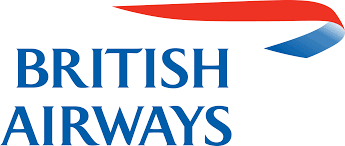
---

## **Introduction 🚀**

Welcome to an exhilarating journey of web scraping and data analysis! 🌐💻 In this Jupyter notebook, I'll embark on a mission to collect and analyze online reviews related to British Airways, one of the world's top airlines. 🛫✈️ To accomplish this, I'll harness the power of Python and the BeautifulSoup library for web scraping.

## **Data Source: Skytrax 🌟**

Our primary data source is [Skytrax](https://www.airlinequality.com), a renowned platform for airline and airport reviews. Skytrax is a treasure trove of information, and for this task, I'll be honing in on reviews exclusively related to British Airways.

To access the British Airways reviews, simply follow this link: [British Airways Reviews on Skytrax](https://www.airlinequality.com/airline-reviews/british-airways). Here, you'll find a wealth of reviews from passengers eager to share their experiences.

Now, let's kick things off by first collecting all the links to these reviews and then extracting the fascinating textual data from each individual review page.

---

## **Table of Contents 📜**

1. Scraping Data from Skytrax
2. Data Collection and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Drawing Insights 📈
5. Conclusion 📝

Without further ado, let's dive into the thrilling realms of web scraping and analysis! 🌊🔍

## **Task 1: Web Scraping and Analysis 🕸️📊**

In [ ]:
#library for scrapping the data
import requests
from bs4 import BeautifulSoup

#libary to manipulate the data
import pandas as pd
import numpy as np

#for preprocessing the data
import nltk
from nltk.stem import PorterStemmer

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


from the information i got, i collected for about 1000 rows of reviews from the british airlines

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,"✅ Trip Verified | I had a flight from Miami, F..."
1,✅ Trip Verified | We started our day with BA ...
2,✅ Trip Verified | I fly British Airways weekl...
3,Not Verified | Everything was ok until our co...
4,Not Verified | My initial flight was cancelle...
5,Not Verified | We will never fly British Airw...
6,✅ Trip Verified | Check in and security cleara...
7,Not Verified | British Airways has confirmed ...
8,✅ Trip Verified | Worst BA experience. I was s...
9,✅ Trip Verified | My daughter and I were deni...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## ☕ Basic Datasets Information ☕

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


The summary after the scrapping data from british airways are provided indicates that the british airways have a pandas DataFrame with the following characteristics:


* DataFrame Name: Not specified, but it contains one column named "reviews."
Number of Rows: 1000 entries.
* Column: There is one column named "reviews."
* Data Type: The data type of the "reviews" column is specified as object (which typically represents string data).
* Non-Null Count: There are 1000 non-null entries in the "reviews" column, meaning there are no missing values in this column.

## **Data Preprocessing/Cleansing**

because we only have one review column, we will focus on cleaning and preprocessing the review columns, and maybe create a new columns then create an analysis from the data

### **Create a new colums 'review_setiment'**

In [ ]:
# Function to classify reviews based on the presence of ✅ emoji
def classify_sentiment(review):
    if 'Trip Verified' in review:
        return 'Positive'
    else:
        return 'Negative'

# Create a new column "review_sentiment"
df['review_sentiment'] = df['reviews'].apply(classify_sentiment)

# Display the DataFrame
print(df)

                                               reviews review_sentiment
0    ✅ Trip Verified | I had a flight from Miami, F...         Positive
1    ✅ Trip Verified |  We started our day with BA ...         Positive
2    ✅ Trip Verified |  I fly British Airways weekl...         Positive
3    Not Verified |  Everything was ok until our co...         Negative
4    Not Verified |  My initial flight was cancelle...         Negative
..                                                 ...              ...
995  ✅ Trip Verified |  Phoenix to Accra via London...         Positive
996  ✅ Trip Verified |  Manchester to London. The b...         Positive
997  ✅ Trip Verified |  San Diego to Hannover via L...         Positive
998  ✅ Trip Verified |  London Heathrow to Stuttgar...         Positive
999  ✅ Trip Verified |  London to Johannesburg. Tur...         Positive

[1000 rows x 2 columns]


In [ ]:
# Count the number of positive and negative reviews
sentiment_counts = df['review_sentiment'].value_counts()

# Create a formatted summary
sentiment_summary = f"Sentiment Analysis Summary 📊\n\n"
sentiment_summary += f"Positive Reviews ✅: {sentiment_counts['Positive']} reviews\n"
sentiment_summary += f"Negative Reviews ❌: {sentiment_counts['Negative']} reviews"

# Display the summary
print(sentiment_summary)

Sentiment Analysis Summary 📊

Positive Reviews ✅: 791 reviews
Negative Reviews ❌: 209 reviews


After performing sentiment analysis on the reviews, we've uncovered interesting insights into passenger sentiments regarding British Airways:

- **Positive Reviews** ✅: There are a total of 791 positive reviews, marked with the ✅ emoji. Passengers who shared positive experiences and impressions make up the majority of the dataset.

- **Negative Reviews** ❌: There are 209 negative reviews without the ✅ emoji. These reviews indicate areas where passengers may have encountered issues or challenges during their interactions with British Airways.

This sentiment analysis provides a valuable initial perspective on passenger feedback. Further exploration and analysis can help us delve deeper into the specific aspects that contributed to these sentiments.



### **Minimize all the keyword character**

In [ ]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to apply stemming to text
def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the "reviews" column directly
df['reviews'] = df['reviews'].apply(stem_text)

# Display the DataFrame
print(df)

                                               reviews review_sentiment
0    ✅ trip verifi | i had a flight from miami, flo...         Positive
1    ✅ trip verifi | we start our day with ba in pr...         Positive
2    ✅ trip verifi | i fli british airway weekli no...         Positive
3    not verifi | everyth wa ok until our connect f...         Negative
4    not verifi | my initi flight wa cancel 8 hour ...         Negative
..                                                 ...              ...
995  ✅ trip verifi | phoenix to accra via london. i...         Positive
996  ✅ trip verifi | manchest to london. the bag dr...         Positive
997  ✅ trip verifi | san diego to hannov via london...         Positive
998  ✅ trip verifi | london heathrow to stuttgart. ...         Positive
999  ✅ trip verifi | london to johannesburg. turn r...         Positive

[1000 rows x 2 columns]


## **Visualization Analysis**

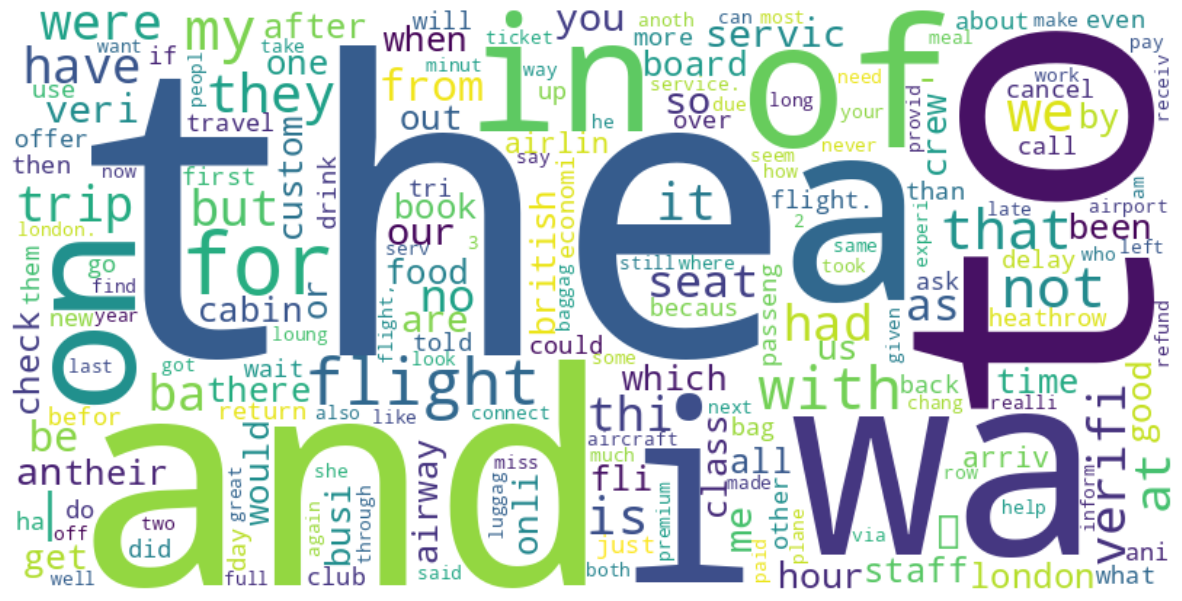

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word frequency analysis
word_freq = df['reviews'].str.split(expand=True).stack().value_counts()

# Create and display a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

there's still nothing interesting summary or point that we can pull from the plot

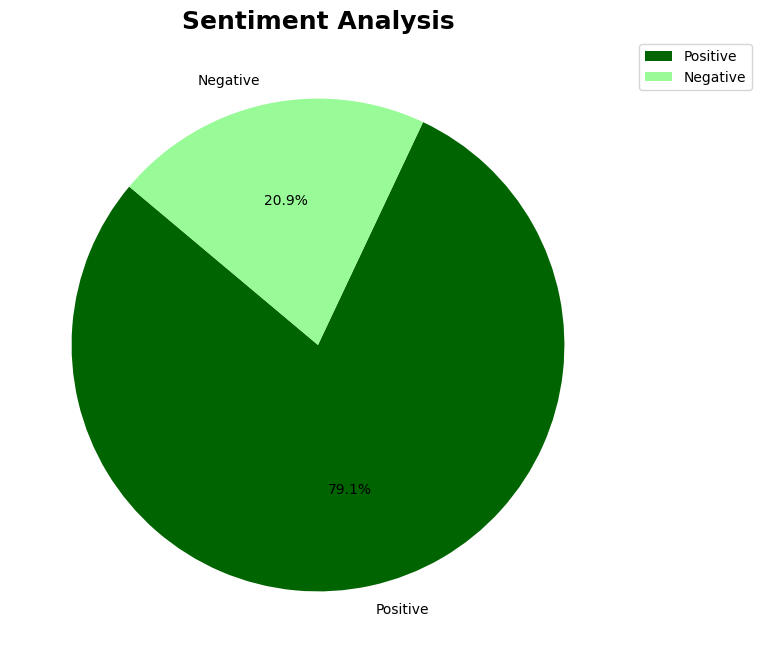

In [ ]:
data = {
    'review_sentiment': ['Positive', 'Negative'],
    'counts': [791, 209]
}

df = pd.DataFrame(data)

# Calculate the percentages
total_reviews = df['counts'].sum()
df['percentages'] = (df['counts'] / total_reviews) * 100

# Create a pie plot with custom colors
colors = ['darkgreen', 'palegreen']

plt.figure(figsize=(15, 8))  # Set the figsize

plt.pie(df['percentages'], labels=df['review_sentiment'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Analysis', fontsize=18, fontweight='bold')
plt.legend(bbox_to_anchor=(1.01, 1),
           loc='upper left',
           )

# Show the plot
plt.show()

## **Sentiment Distribution Summary 📊**

from the plot above passenger sentiments from the reviews, we observe the following distribution:

* A significant majority of the reviews, accounting for 79.1%, express satisfaction and positive experiences with the airline.

* and 20.9% of the reviews indicate areas where passengers may have encountered challenges or issues during their interactions with the airline.

This distribution underscores the predominantly positive sentiment in the reviews, while also highlighting areas of improvement for the airline's services and customer experiences.
